# Programa para plotar a localizacao das estações de superficie e pluviometros utilizados na validacao das simulacoes numericas

In [20]:
%matplotlib inline
import pygmt
import os
import geopandas as gpd
import pandas as pd
import numpy as np

In [5]:
#rmsp = os.path.join("Shapefile", "path/shapefile.shp") #Shapefile RSMP
#gdf = gpd.read_file(rmsp)

In [10]:
# Pluviometros da ANA, CEMADEN e estacao IAG e INMET
data = pd.read_table('path/Filename.txt', sep='\s+')
data # Evento 18/12/2016

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_25615/2860383262.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_table('/media/mariana/SAMSUNG/USP/Projeto_Doutorado/Dados_obs/Evento20161218/Precipitacao/Dados_pluviometro_CEMADEN/Dados_MMP_2016_ANA_CEMADEN.txt', sep='\s+')


,Estacao,Lat,Lon,Ano,Mes,Dia,Chuva
0,2246170,-22.850,-46.242,2016.0,12.0,18.0,5.2
1,2247058,-22.959,-47.296,2016.0,12.0,18.0,0.0
2,2346095,-23.103,-46.558,2016.0,12.0,18.0,0.0
3,2347056,-23.090,-47.727,2016.0,12.0,18.0,0.0
4,2246033,-22.881,-46.632,2016.0,12.0,18.0,6.4
...,...,...,...,...,...,...,...
433,355070415A,-23.793,-45.403,2016.0,12.0,18.0,0.0
434,355070416A,-23.793,-45.566,2016.0,12.0,18.0,0.0
435,355070418A,-23.823,-45.415,2016.0,12.0,18.0,0.0
436,355070419A,-23.767,-45.596,2016.0,12.0,18.0,1.0


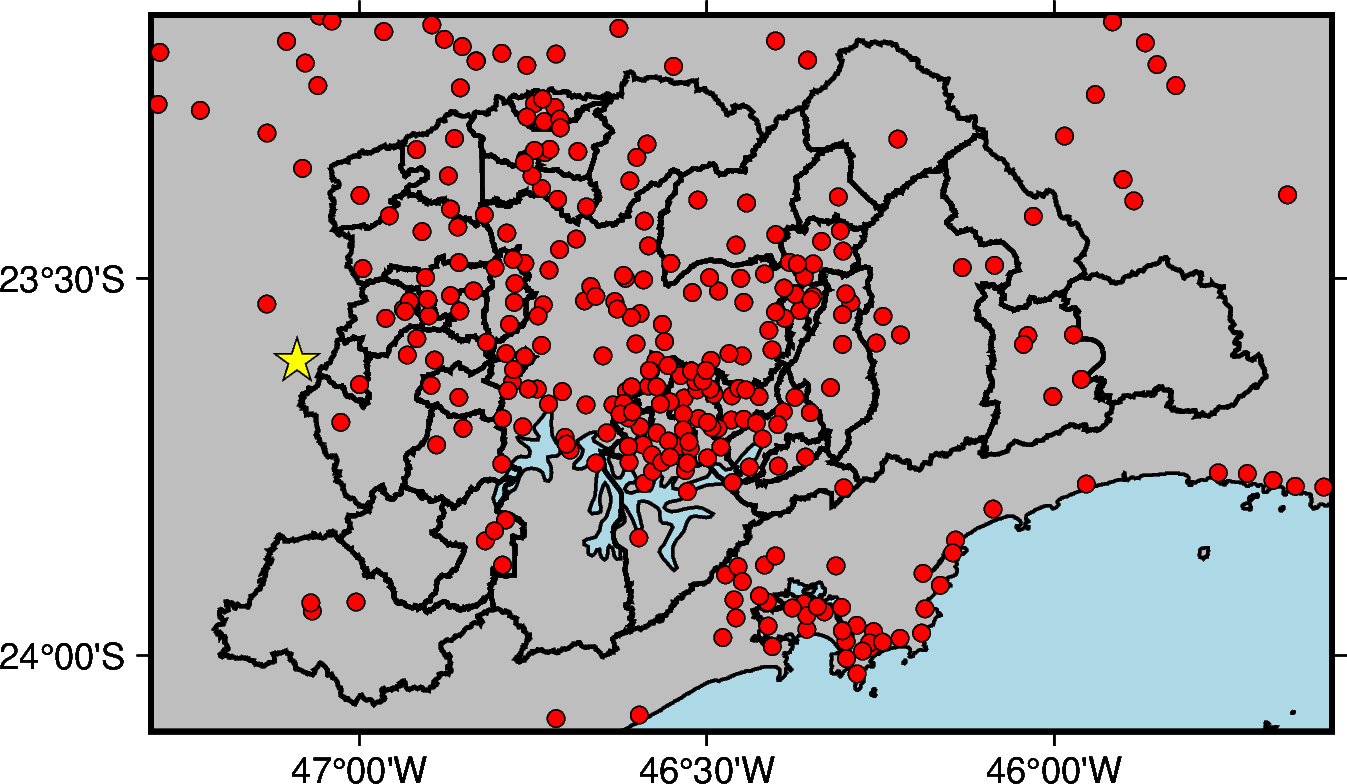

In [12]:
region=[-47.3, -45.6, -24.1, -23.15]
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
fig.basemap(region=region, projection="M10c", frame=['x0.5','y0.5', 'SWne'])
fig.coast(
    land='gray',water="lightblue",
    borders="2/thin",  # Plot state boundaries with thin lines
    shorelines="thin",  # Plot coastline with thin lines
    projection="M10c",  # Set Mercator projection and size of 15 centimeter
    frame=['x0.5','y0.5', 'SWne'],  # Set frame with annotation and major tick spacing
)
fig.plot(data=gdf, pen =["1.0p"])
fig.plot(x=data.Lon, y=data.Lat, style="c0.15c", fill="red", pen="black")
fig.plot(x=-47.09, y=-23.61, style="a0.4c", fill="yellow", pen="black") #Localizacao do radar de São Roque
fig.savefig("Estacoes_Precipitacao.png", crop=True, dpi=300)
fig.show()

In [13]:
# Pluviometros da ANA, CEMADEN e estacao IAG e INMET
data_evento2 = pd.read_table('path/Filename.txt', sep='\s+')
data_evento2 # Evento 22/02/2017

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_25615/1530139355.py:2: SyntaxWarning: invalid escape sequence '\s'
  data_evento2 = pd.read_table('/media/mariana/SAMSUNG/USP/Projeto_Doutorado/Dados_obs/Evento20170222/Precipitacao/Pluviometros/DadosCompletos.txt', sep='\s+')


,Estacao,Lat,Lon,Ano,Mes,Dia,Chuva
0,2244001,-22.549,-44.789,2017.0,2.0,22.0,0.0
1,2244010,-22.692,-44.975,2017.0,2.0,22.0,0.0
2,2244043,-22.581,-44.268,2017.0,2.0,22.0,0.0
3,2244048,-22.921,-44.822,2017.0,2.0,22.0,0.0
4,2244135,-22.736,-44.627,2017.0,2.0,22.0,0.0
...,...,...,...,...,...,...,...
701,A701,-46.620,-23.496,2017.0,2.0,22.0,0.6
702,A755,-46.869,-23.523,2017.0,2.0,22.0,4.8
703,A713,-47.585,-23.426,2017.0,2.0,22.0,0.0
704,A726,-47.623,-22.703,2017.0,2.0,22.0,0.0


In [ ]:
region=[-47.3, -45.6, -24.1, -23.15]
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
fig.basemap(region=region, projection="M10c", frame=['x0.5','y0.5', 'SWne'])
fig.coast(
    land='gray',water="lightblue",
    borders="2/thin",  # Plot state boundaries with thin lines
    shorelines="thin",  # Plot coastline with thin lines
    projection="M10c",  # Set Mercator projection and size of 15 centimeter
    frame=['x0.5','y0.5', 'SWne'],  # Set frame with annotation and major tick spacing
)
fig.plot(data=gdf, pen =["1.0p"])
fig.plot(x=data_evento2.Lon, y=data_evento2.Lat, style="c0.15c", fill="red", pen="black")
fig.plot(x=-47.09, y=-23.61, style="a0.4c", fill="yellow", pen="black") #Localizacao do radar de São Roque
fig.savefig("Estacoes_PrecipitacaoEvento2.png", crop=True, dpi=300) 
fig.show()

In [18]:
# Latitude e longitude das estacoes de superficie  
estacoes = np.array([[-23.44,-46.47],[-23.50,-46.63], #Guarulhos, Campo de Marte
            [-23.62,-46.65],[-23.5389,-46.86945],[-23.6655,-46.78207], #Congonhas, Barueri (INMET), Capao Redondo (CETESB)
            [-23.68097,-46.67577],[-23.51864,-46.74302], # Interlagos, Pontes dos remedios (CETESB)
            [-23.54602,-46.62717],[-23.56159,-46.70206]]) #Parque D.Pedro II, Pinheiros (CETESB) 
estacoes[:,1]

array([-46.47   , -46.63   , -46.65   , -46.86945, -46.78207, -46.67577,
       -46.74302, -46.62717, -46.70206])

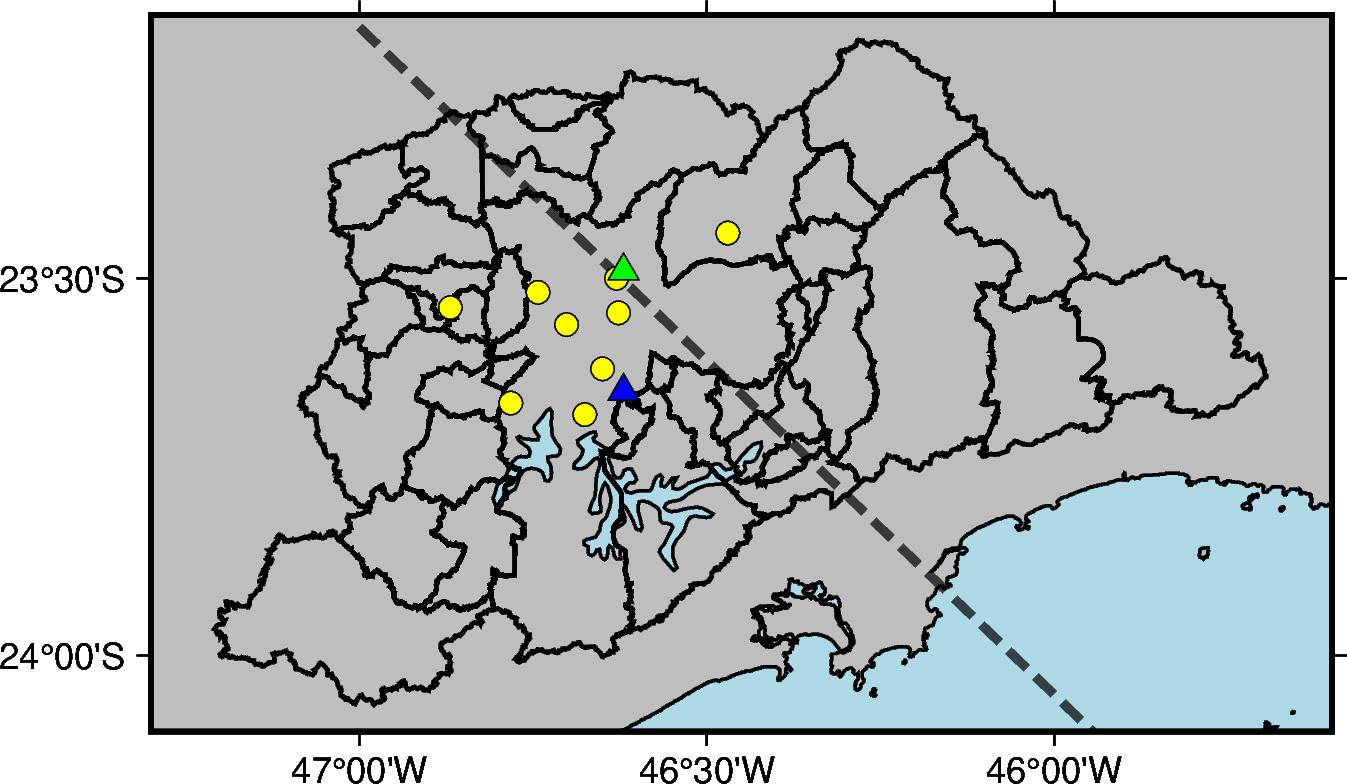

In [19]:
region=[-47.3, -45.6, -24.1, -23.15]
#region=[-47.08, -46.0, -23.87, -23.22]
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
fig.basemap(region=region, projection="M10c", frame=['x0.5','y0.5', 'SWne'])
fig.coast(
    land='gray',water="lightblue",
    borders="2/thin",  # Plot state boundaries with thin lines
    shorelines="thin",  # Plot coastline with thin lines
    projection="M10c",  # Set Mercator projection and size of 15 centimeter
    frame=['x.5','y.5', 'SWne'],  # Set frame with annotation and major tick spacing
)
point_1 = [-47.0, -23.1666]
point_2 = [-46.0, -24.182]
data = np.array([point_1 + point_2])
fig.plot(
    data=data,
    style = 'V0c+e',
    pen = '2.1,black,6_3:0p',
    transparency = '30'
)
fig.plot(data=gdf, pen =["1.0p"])
fig.plot(x=estacoes[:,1], y=estacoes[:,0], style="c0.2c", fill="yellow", pen="black")
fig.plot(x=-46.62, y=-23.65, style="t0.3c", fill="blue", pen="black") #Localizacao da estacao do IAG
fig.plot(x=-46.62, y=-23.49, style="t0.3c",fill="green", pen="black") #Localizacao da estacao Mirante de Santana
#fig.savefig("Estacoes_Superficie.png", crop=True, dpi=300)
fig.show()